In [1]:
import nltk

In [3]:
nltk.corpus

<LazyModule 'nltk.corpus'>

In [5]:
import nltk.corpus.gutenberg

ModuleNotFoundError: No module named 'nltk.corpus.gutenberg'

In [6]:
from nltk.corpus import brown

In [8]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


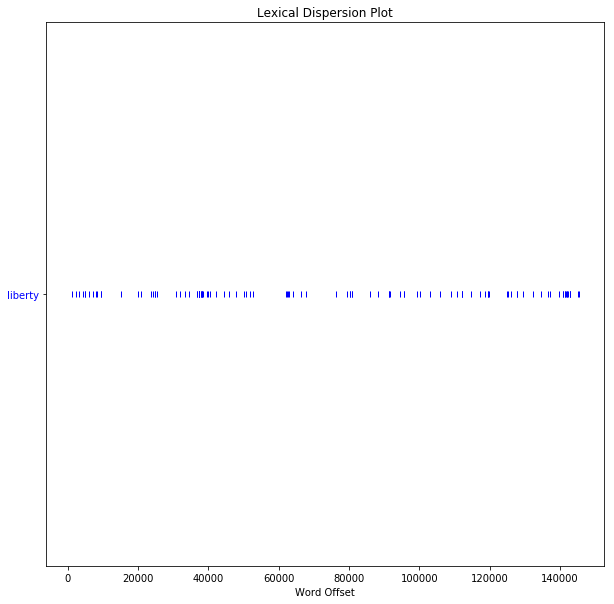

In [9]:
from matplotlib.pylab import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams.update({'font.size': 10})
# พล็อตกราฟความถี่คำออกมา
text4.dispersion_plot(["liberty"])

In [53]:
from nltk.corpus import brown 
from nltk import FreqDist,ConditionalFreqDist
most_common_list = []
longest_list = []
categories = brown.categories()[0:6]
for catogory in categories:
    words_len = [len(w) for w in brown.words(categories=catogory) if w.isalpha()]
    freq = FreqDist(words_len)
    longest_list.append(max(freq.keys()))
    most_common_list.append(freq.most_common(1)[0][0])
if(len(set(most_common_list)) == 1):
    print("คำที่มีความถี่สูงสุด เหมือนกันในทุก categories ")
else:
    print("คำที่มีความถี่สูงสุด ไม่เหมือนกัน สำหรับแต่ละ categories ")
print("Categories | a) ความยาวของคำที่พบมากสุด | b) ความยาวของคำที่ยาวที่สุด")
for i in range(len(categories)):
    print(categories[i]," | ",most_common_list[i]," | ",longest_list[i])


คำที่มีความถี่สูงสุด เหมือนกันในทุก categories 
Categories | a) ความยาวของคำที่พบมากสุด | b) ความยาวของคำที่ยาวที่สุด
adventure  |  3  |  17
belles_lettres  |  3  |  19
editorial  |  3  |  19
fiction  |  3  |  16
government  |  3  |  18
hobbies  |  3  |  18


In [42]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [54]:
def longest_vocab(text):
    max_length = max([len(w) for w in text])
    return [w for w in text if len(w) == max_length]

In [58]:
from nltk.corpus import brown
print(longest_vocab(brown.words(categories='adventure')))

['hundred-and-eighty-degree']


In [62]:
from nltk import word_tokenize
from urllib import request
from bs4 import BeautifulSoup
def unknown(url):
    response = request.urlopen(url)
    html = response.read().decode('utf8')
    text = BeautifulSoup(html,'html.parser').get_text()
    tokens = word_tokenize(text)
    text_vocab = set(w.lower() for w in tokens if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [63]:
unknown("http://news.bbc.co.uk/2/hi/health/2284783.stm")

['africa',
 'americas',
 'applet',
 'apr',
 'asia',
 'babies',
 'bbc',
 'blondes',
 'bollywood',
 'botox',
 'caused',
 'centuries',
 'dyed',
 'ebola',
 'edinburgh',
 'editions',
 'endangered',
 'europe',
 'experts',
 'explains',
 'families',
 'fears',
 'genes',
 'germany',
 'gmt',
 'grandparents',
 'having',
 'http',
 'img',
 'imgn',
 'internet',
 'labelled',
 'launched',
 'mmiii',
 'notes',
 'online',
 'partners',
 'profiles',
 'programmes',
 'researchers',
 'rivals',
 'scientists',
 'services',
 'sites',
 'sources',
 'stories',
 'strokes',
 'suggests',
 'symptoms',
 'textflow',
 'tsi',
 'uk',
 'var',
 'vegetables',
 'widdecombe',
 'years']

In [64]:
words = ['attribution', 'confabulation', 'elocution', 'sequoia', 'tenacious', 'unidirectional']

In [69]:
result = ["".join(re.findall('[aeiou]',word)) for word in words]

In [70]:
result

['aiuio', 'oauaio', 'eouio', 'euoia', 'eaiou', 'uiieioa']

In [29]:
from nltk.corpus import stopwords, inaugural 
from nltk import FreqDist,bigrams
def bigram(wordlist):
    stopword = stopwords.words('english')
    words = [w for w in wordlist if w.isalpha() and w not in stopword]
    word_bigram = bigrams(words)
    freq = FreqDist(word_bigram)
    return freq.most_common(5)
print(bigram(inaugural.words(fileids = '1797-Adams.txt')))

[(('foreign', 'nations'), 5), (('people', 'America'), 3), (('Constitution', 'United'), 3), (('United', 'States'), 3), (('fellow', 'citizens'), 3)]


In [74]:
from nltk.corpus import brown
from nltk import pos_tag,bigrams,FreqDist
wordlist = brown.words(categories='news')
tags = pos_tag(wordlist,tagset='universal')
bigram_list = list(bigrams([tag for word,tag in tags]))
freq = FreqDist([b[0] for b in bigram_list if b[1] == 'VERB'])
print(freq.most_common(3))

[('NOUN', 4180), ('VERB', 2858), ('PRON', 1863)]


In [67]:
import nltk
u = nltk.Text([tag for word,tag in tags])

In [58]:
[b for b in list(bigram_list)]

[]

[('NOUN', 'VERB'),
 ('NOUN', 'VERB'),
 ('NOUN', 'VERB'),
 ('ADV', 'VERB'),
 ('DET', 'VERB'),
 ('.', 'VERB'),
 ('NOUN', 'VERB'),
 ('VERB', 'VERB'),
 ('NOUN', 'VERB'),
 ('VERB', 'VERB'),
 ('VERB', 'VERB'),
 ('PRT', 'VERB'),
 ('DET', 'VERB'),
 ('VERB', 'VERB'),
 ('NOUN', 'VERB'),
 ('VERB', 'VERB'),
 ('NOUN', 'VERB'),
 ('.', 'VERB'),
 ('NOUN', 'VERB'),
 ('PRON', 'VERB'),
 ('VERB', 'VERB'),
 ('.', 'VERB'),
 ('VERB', 'VERB'),
 ('PRON', 'VERB'),
 ('NOUN', 'VERB'),
 ('PRT', 'VERB'),
 ('NOUN', 'VERB'),
 ('CONJ', 'VERB'),
 ('CONJ', 'VERB'),
 ('NOUN', 'VERB'),
 ('PRON', 'VERB'),
 ('.', 'VERB'),
 ('ADV', 'VERB'),
 ('CONJ', 'VERB'),
 ('ADV', 'VERB'),
 ('DET', 'VERB'),
 ('NOUN', 'VERB'),
 ('NOUN', 'VERB'),
 ('PRON', 'VERB'),
 ('NOUN', 'VERB'),
 ('VERB', 'VERB'),
 ('VERB', 'VERB'),
 ('PRT', 'VERB'),
 ('CONJ', 'VERB'),
 ('NOUN', 'VERB'),
 ('.', 'VERB'),
 ('VERB', 'VERB'),
 ('PRON', 'VERB'),
 ('.', 'VERB'),
 ('PRT', 'VERB'),
 ('NOUN', 'VERB'),
 ('ADV', 'VERB'),
 ('PRON', 'VERB'),
 ('.', 'VERB'),
 ('VER